Your goal is to develop a predictive model for whether an account will default next 
month, given demographics and historical data. Later in the book, we'll discuss the 
practical application of the model

1. How many columns are there in the data?
These may be features, responses, or metadata.
2. How many rows (samples) are there?
3. What kind of features are there? Which are categorical and which 
are numerical?
Categorical features have values in discrete classes such as "Yes," "No," 
or "Maybe."
Numerical features are typically on a continuous numerical scale, such as 
dollar amounts.
4. What does the data look like in these features?
To see this, you can examine the range of values in numeric features, or the 
frequency of different classes in categorical features, for example.
5. Is there any missing data?

In [22]:
#import necesary libraries
import pandas as pd 
import numpy as np
from numpy.random import default_rng 
import pandas as pd
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline
import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures


In [51]:
data = pd.read_excel('default of credit card clients.xls',header=1)
df = pd.read_excel('default of credit card clients.xls',header=1)
pay  = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 
        'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']
df.columns = pay
df.columns




Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


LIMIT_BAL: Amount of credit provided (in New Taiwanese (NT) dollar) including 
individual consumer credit and the family (supplementary) credit. 
SEX: Gender (1 = male; 2 = female).
EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 
= others). 
MARRIAGE: Marital status (1 = married; 2 = single; 3 = others). 
AGE: Age (year). 
PAY_1–PAY_6: A record of past payments. Past monthly payments, recorded 
from April to September, are stored in these columns. 
PAY_1 represents the repayment status in September; PAY_2 is the repayment 
status in August; and so on up to PAY_6, which represents the repayment status 
in April. 
Loading the Case Study Data with Jupyter and pandas | 23
The measurement scale for the repayment status is as follows: -1 = pay duly; 1 = 
payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 = 
payment delay for 8 months; 9 = payment delay for 9 months and above. 
BILL_AMT1–BILL_AMT6: Bill statement amount (in NT dollar). 
BILL_AMT1 represents the bill statement amount in September; BILL_AMT2
represents the bill statement amount in August; and so on up to BILL_AMT6, 
which represents the bill statement amount in April. 
PAY_AMT1–PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1
represents the amount paid in September; PAY_AMT2 represents the amount 
paid in August; and so on up to PAY_AMT6, which represents the amount paid 
in April. 

In [7]:
data['ID'].nunique() # the number of unique entries 
#This implies that ID is the unique  identifier dor the rows of the data 

30000

In [8]:
data.shape

(30000, 25)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

the measurement scale for the repayment 
status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two 
months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months 
and above" 

In [18]:
data['PAY_0'].head(5)

0    2
1   -1
2    0
3    0
4   -1
Name: PAY_0, dtype: int64

In [19]:
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [21]:
#find all the rows that don't have missing data for the PAY_0 feature
valid_pay_0_mask = data['PAY_0'] != 'Not available'
#valid_pay_0_mask[0:5]
sum(valid_pay_0_mask) 

30000

##Exploring the Credit Limit and Demographic Features

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

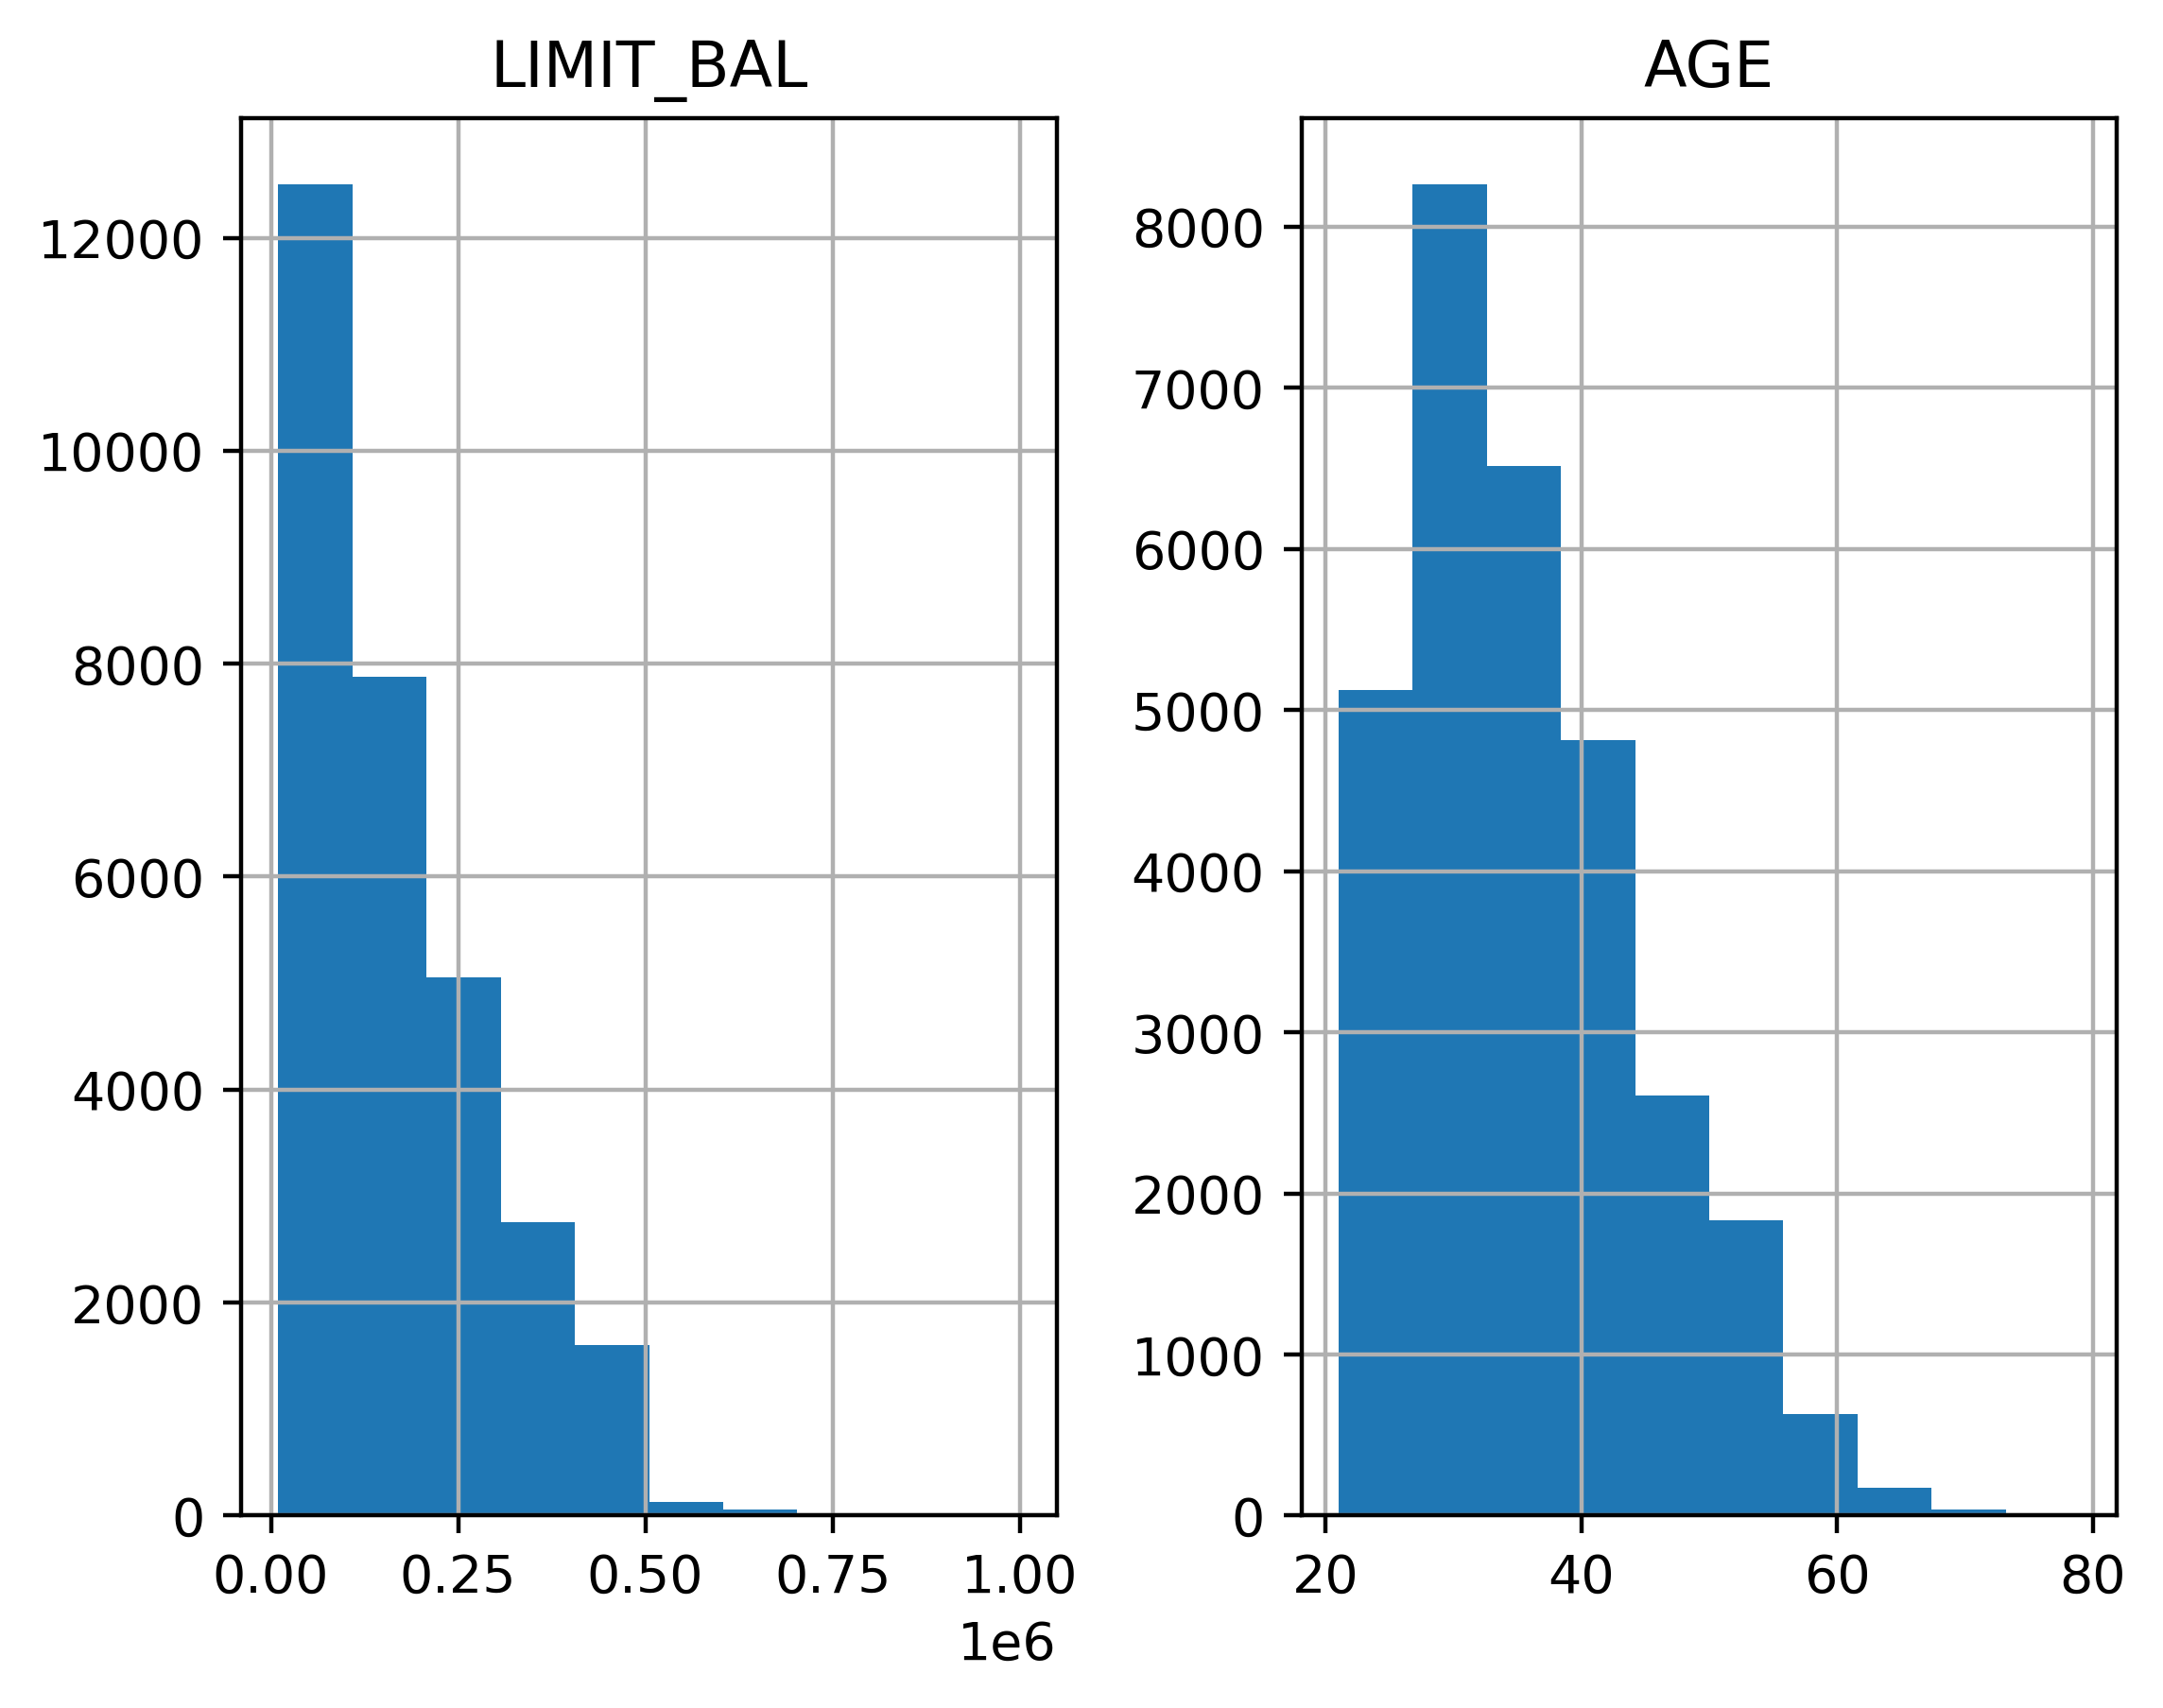

In [23]:
data[['LIMIT_BAL', 'AGE']].hist()

In [25]:
data[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


Education (1 = graduate school; 2 = 
university; 3 = high school; 4 = others)

In [27]:
#the value counts for the EDUCATION feature

data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
data['EDUCATION'].replace(to_replace=[0, 5, 6],\
                                value=4, inplace=True)
data['EDUCATION'].value_counts()
#combine the undocumented levels of the EDUCATION feature 
#into the level for others 

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [30]:
#Same with the marriage
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [31]:
data['MARRIAGE'].replace(to_replace=0, value=3, \
                               inplace=True)
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

This will group the data by the values in the EDUCATION feature and then within 
each group aggregate the data together using the average of the default 
payment next month

Text(0.5, 0, 'Education level: ordinal encoding')

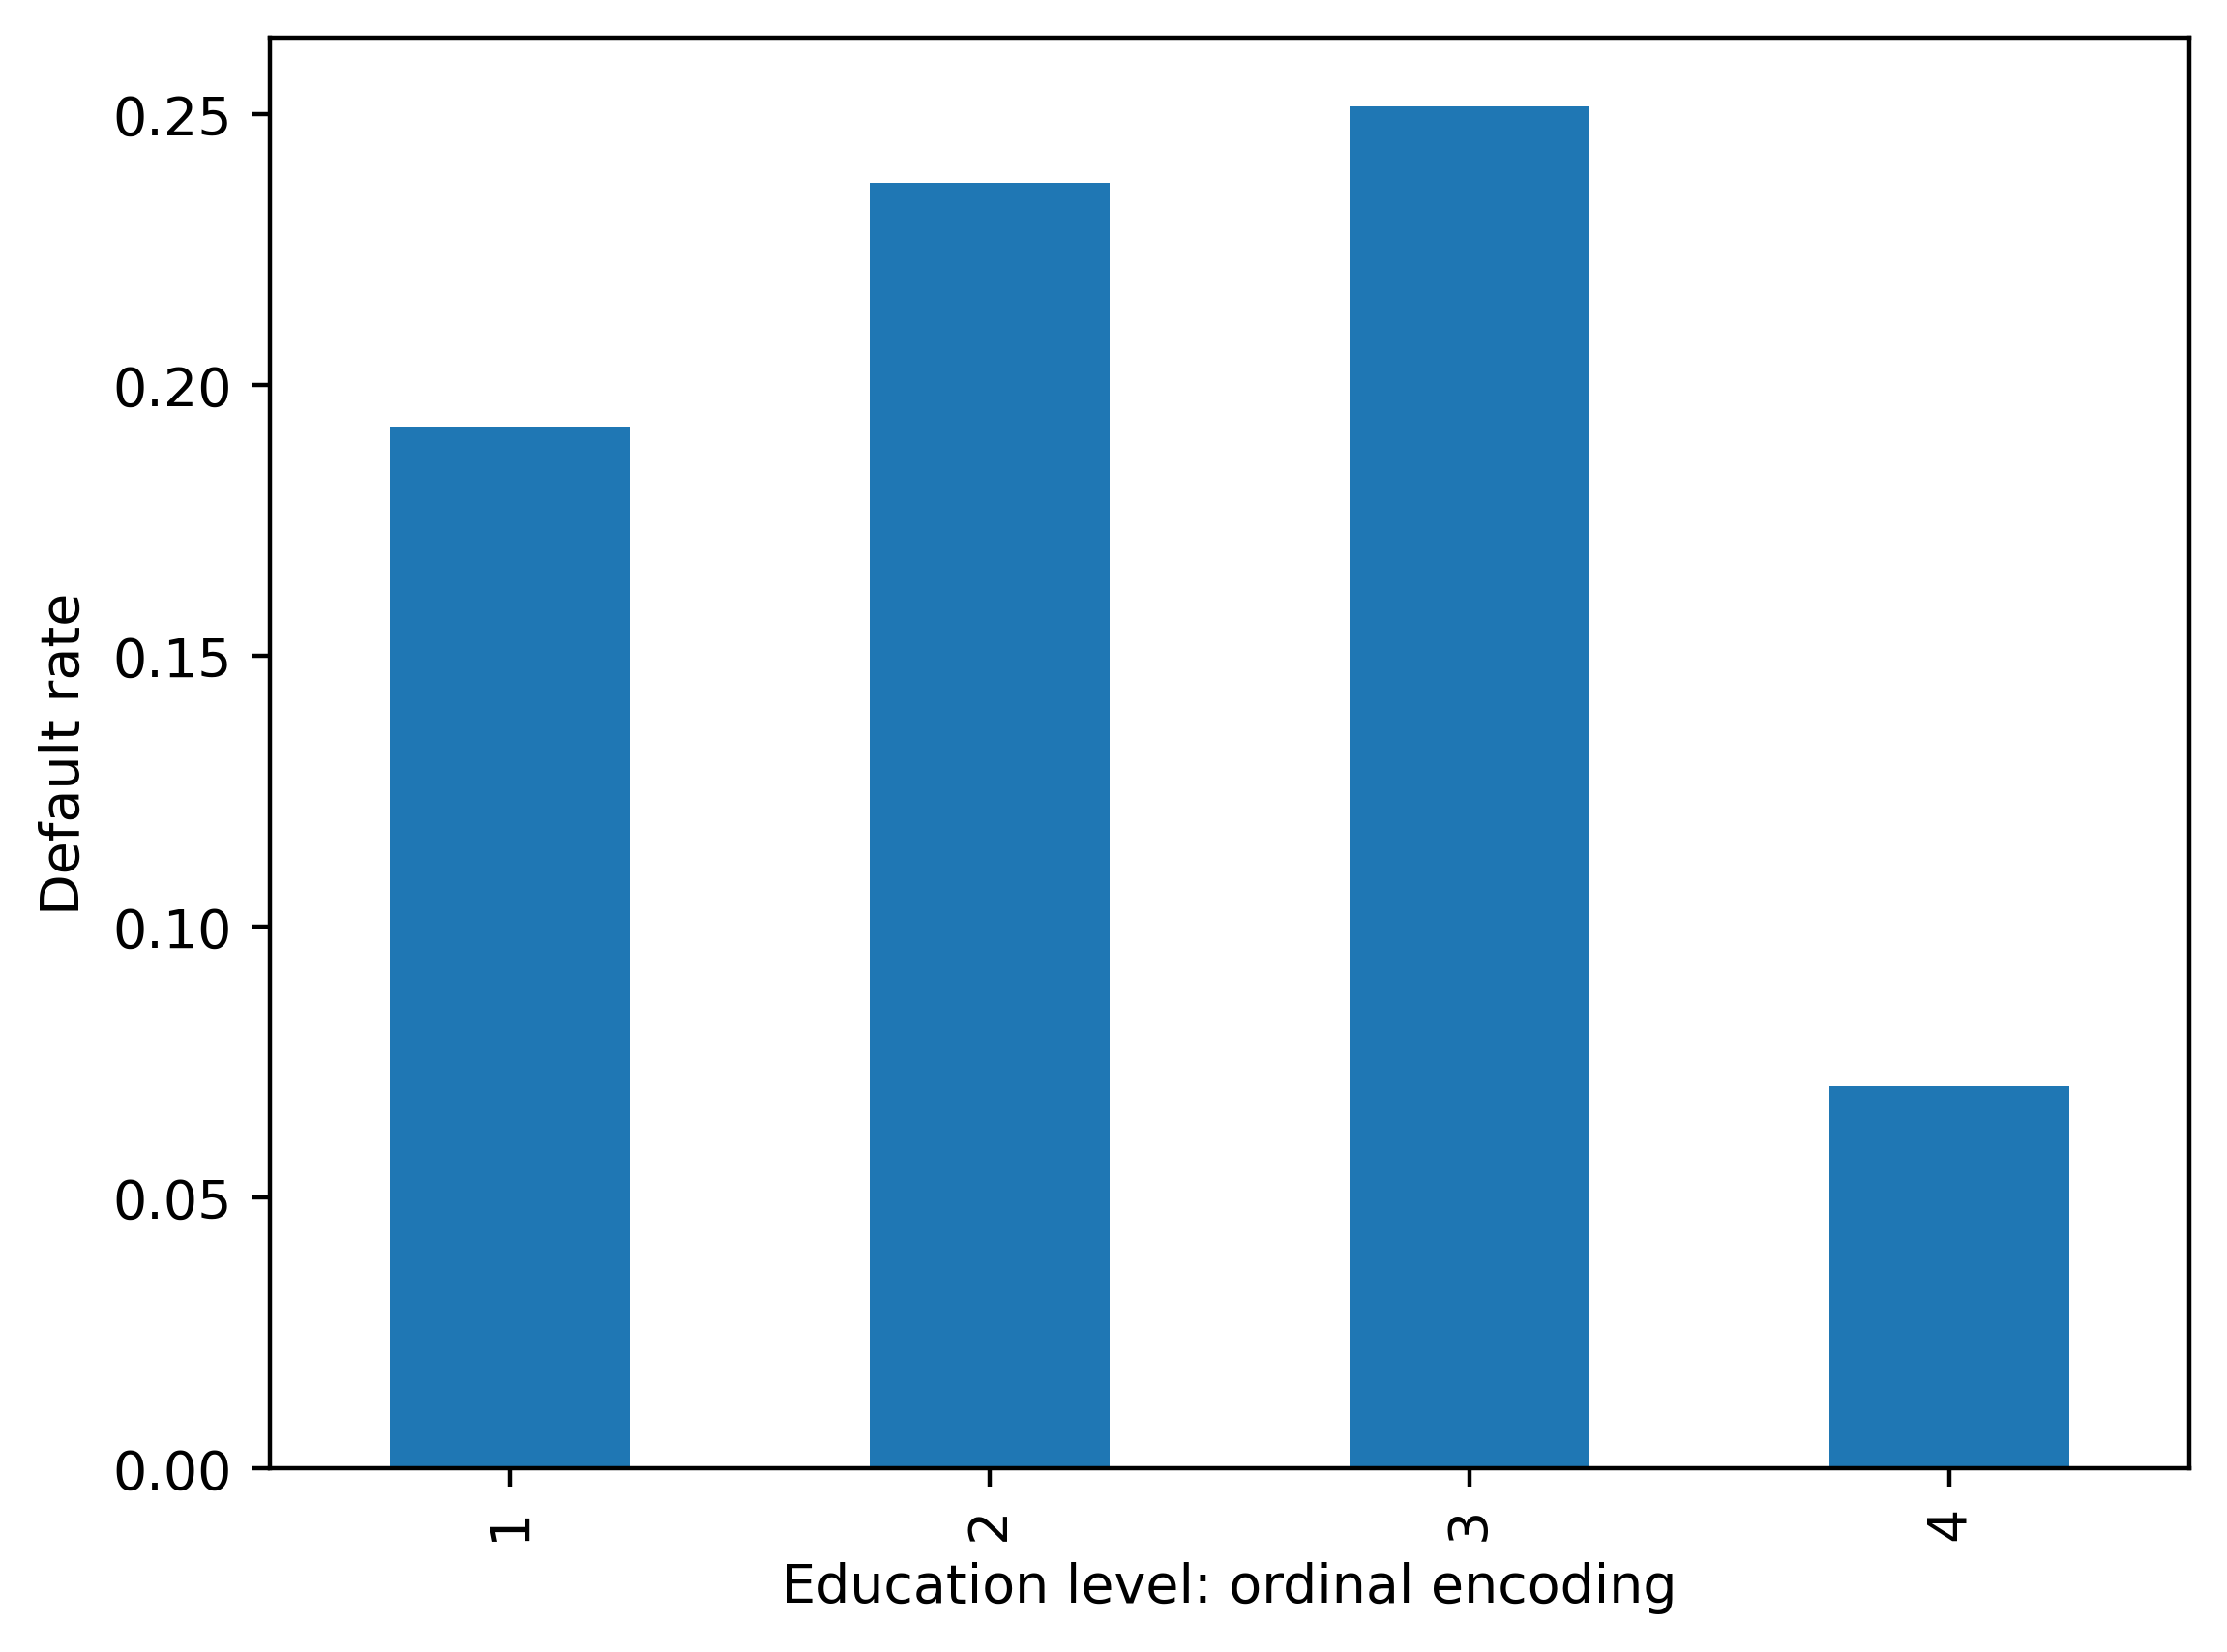

In [32]:
data.groupby('EDUCATION').agg({'default payment next '\
 'month':'mean'})\
 .plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

## Implementing OHE for a Categorical Feature

In [35]:
data['EDUCATION_CAT'] = 'none'
data[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [37]:
cat_mapping = {1: "graduate school",\
 2: "university",\
 3: "high school",\
               4: "others"}

data['EDUCATION_CAT'] = data['EDUCATION']\
 .map(cat_mapping)
data[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [38]:
edu_ohe = pd.get_dummies(data['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [52]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', \
             'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [53]:
df[pay_feats[0]].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64

<AxesSubplot:>

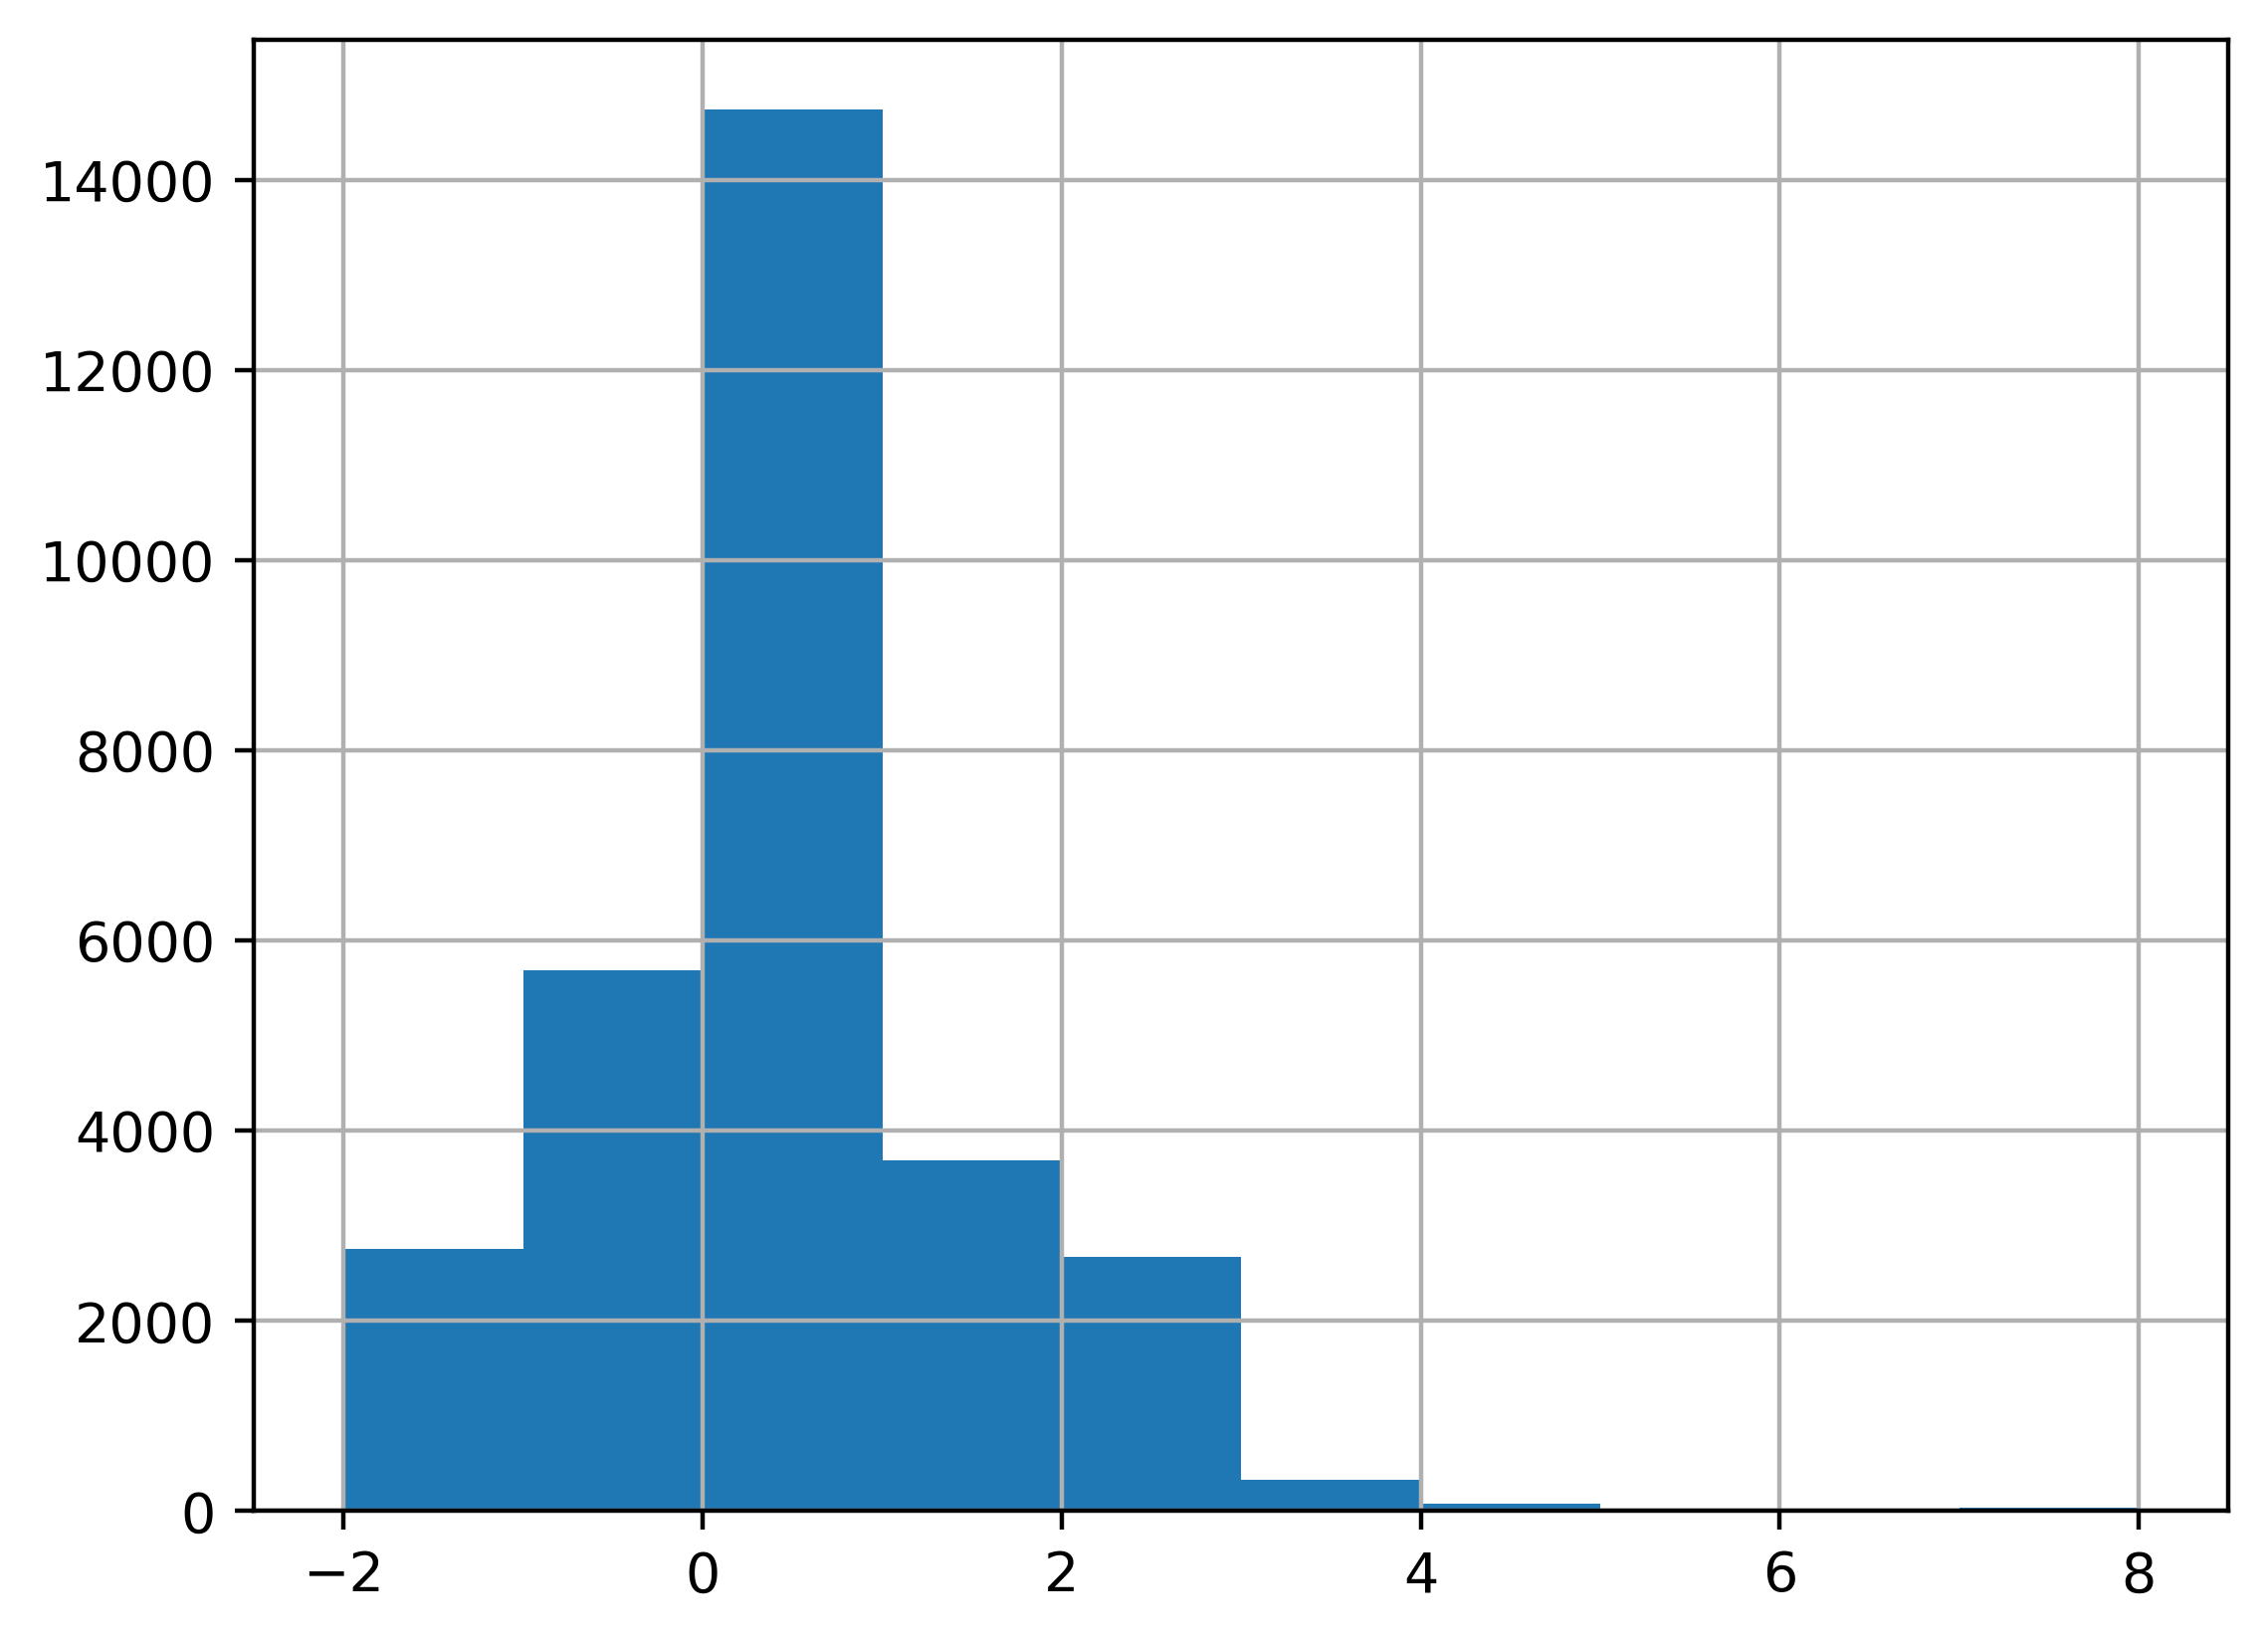

In [54]:
df[pay_feats[0]].hist()

In [55]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

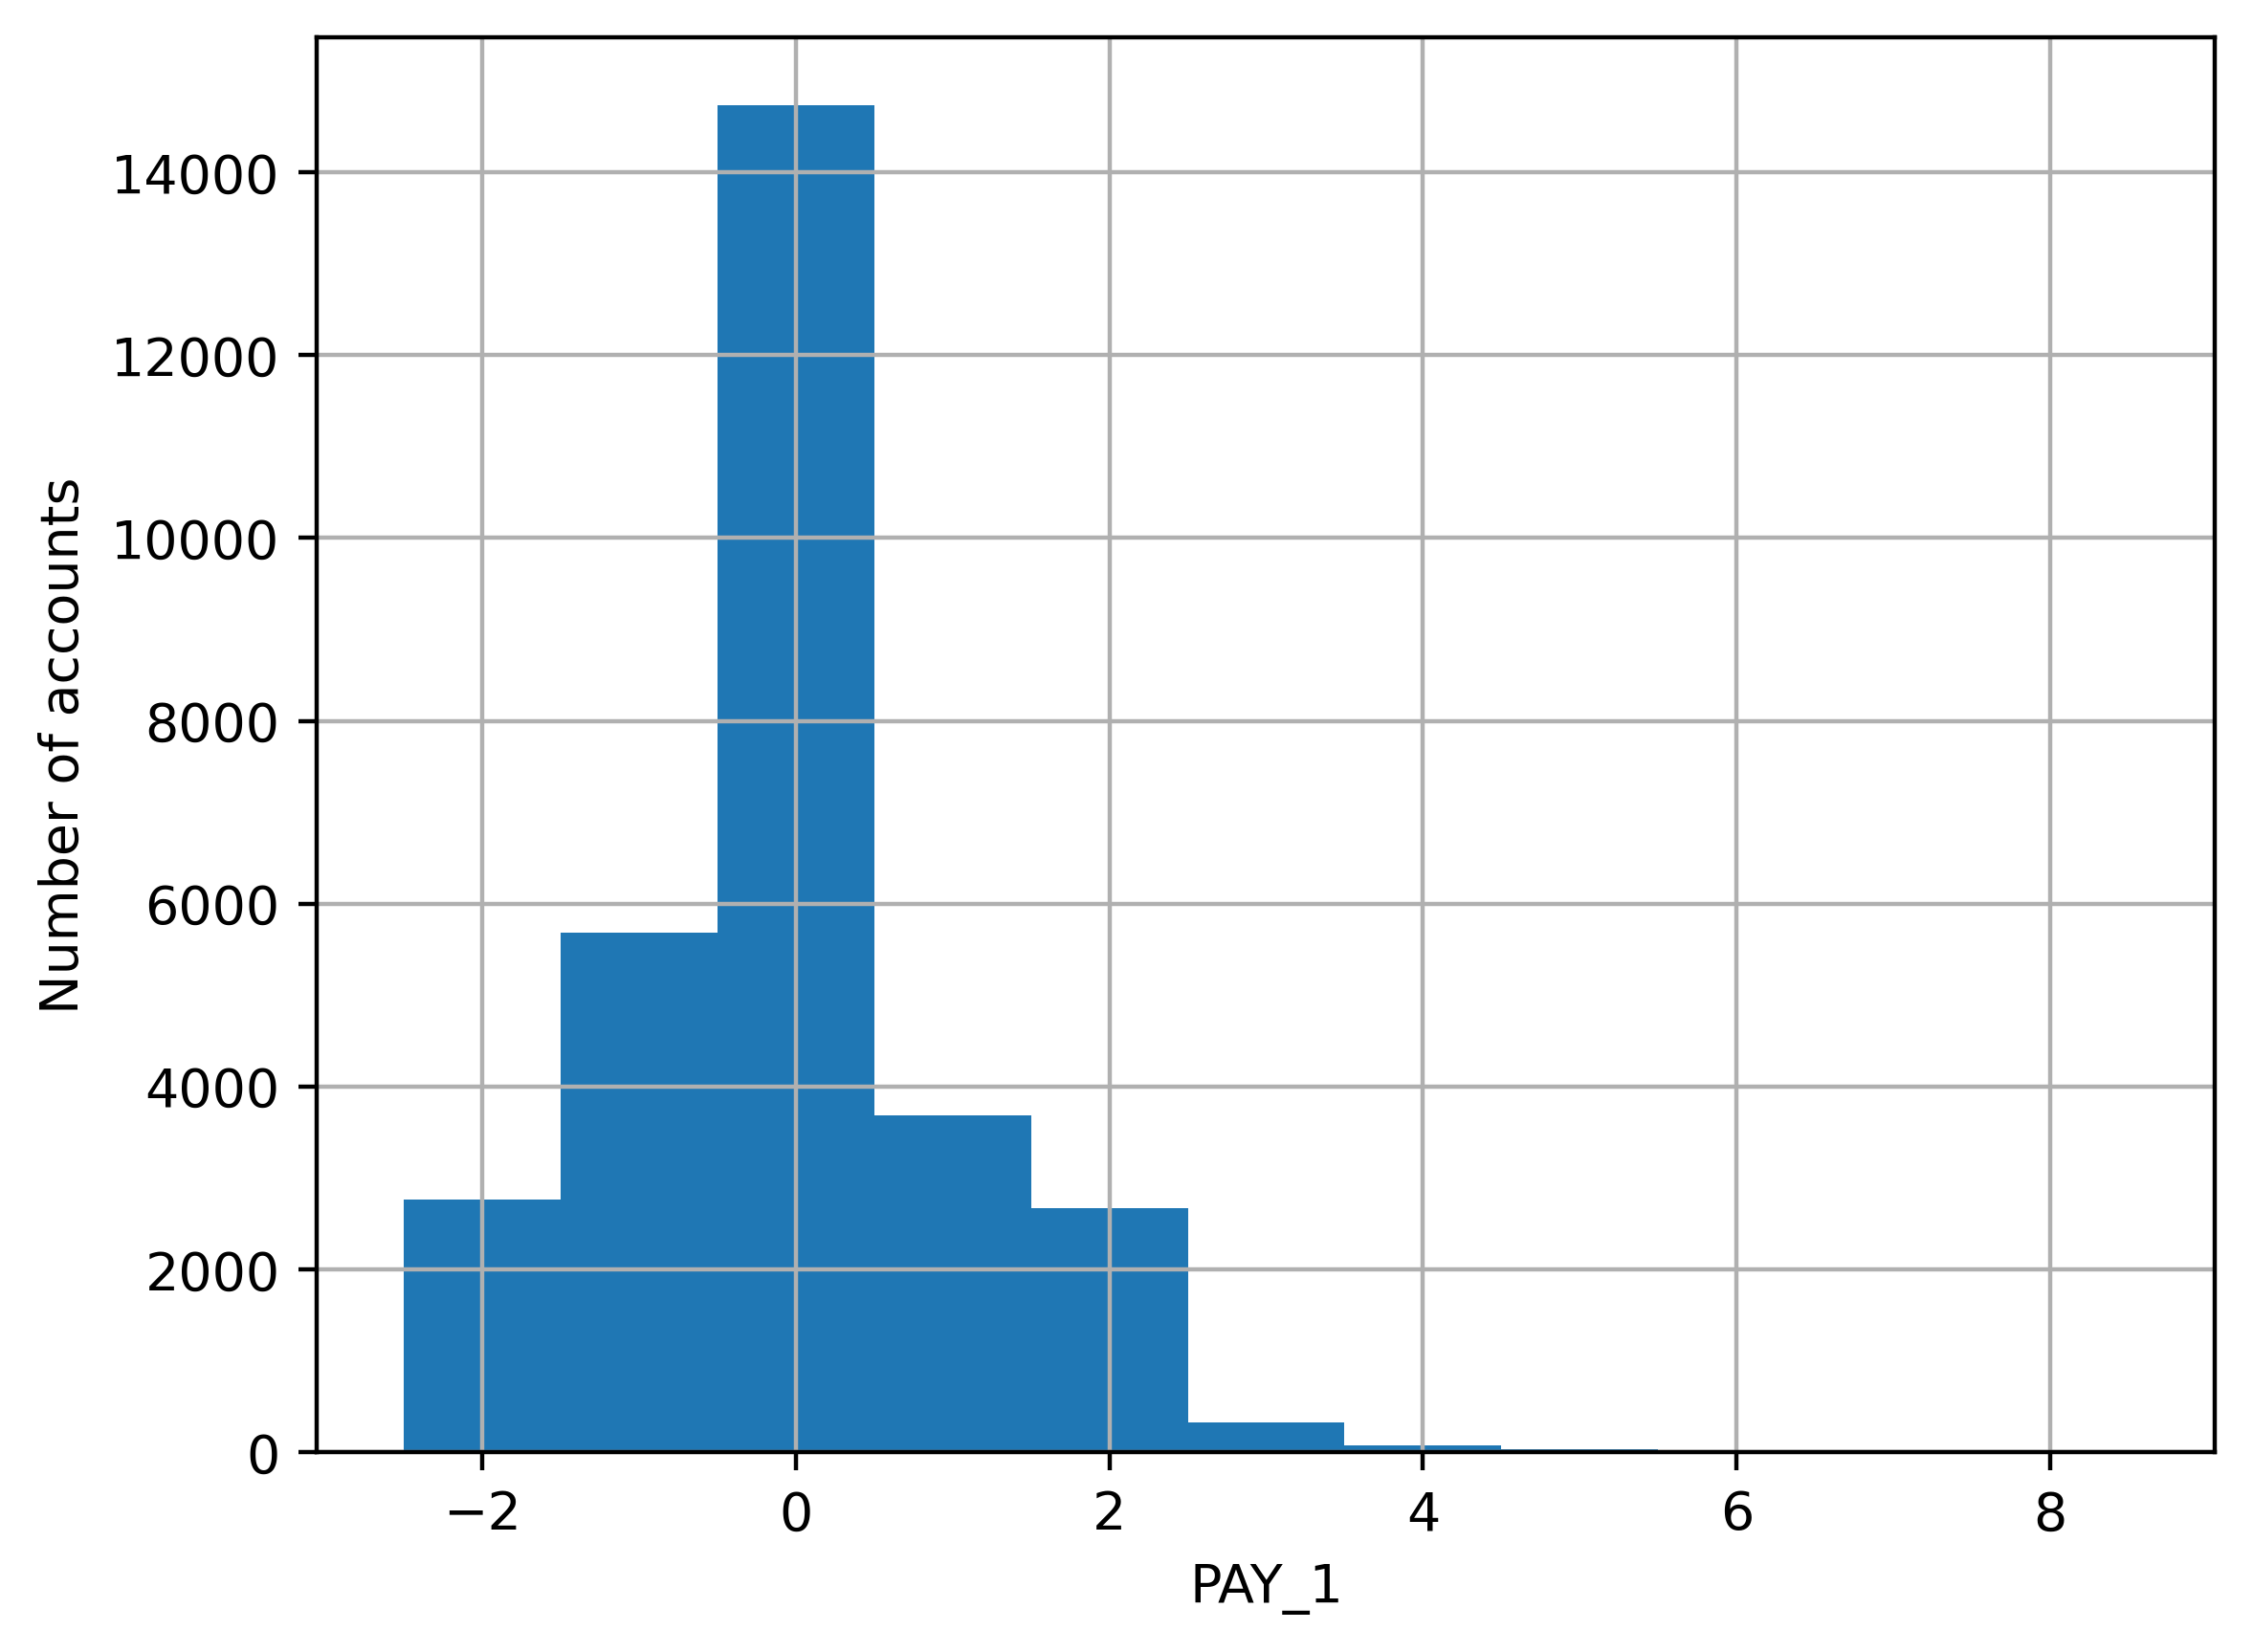

In [56]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

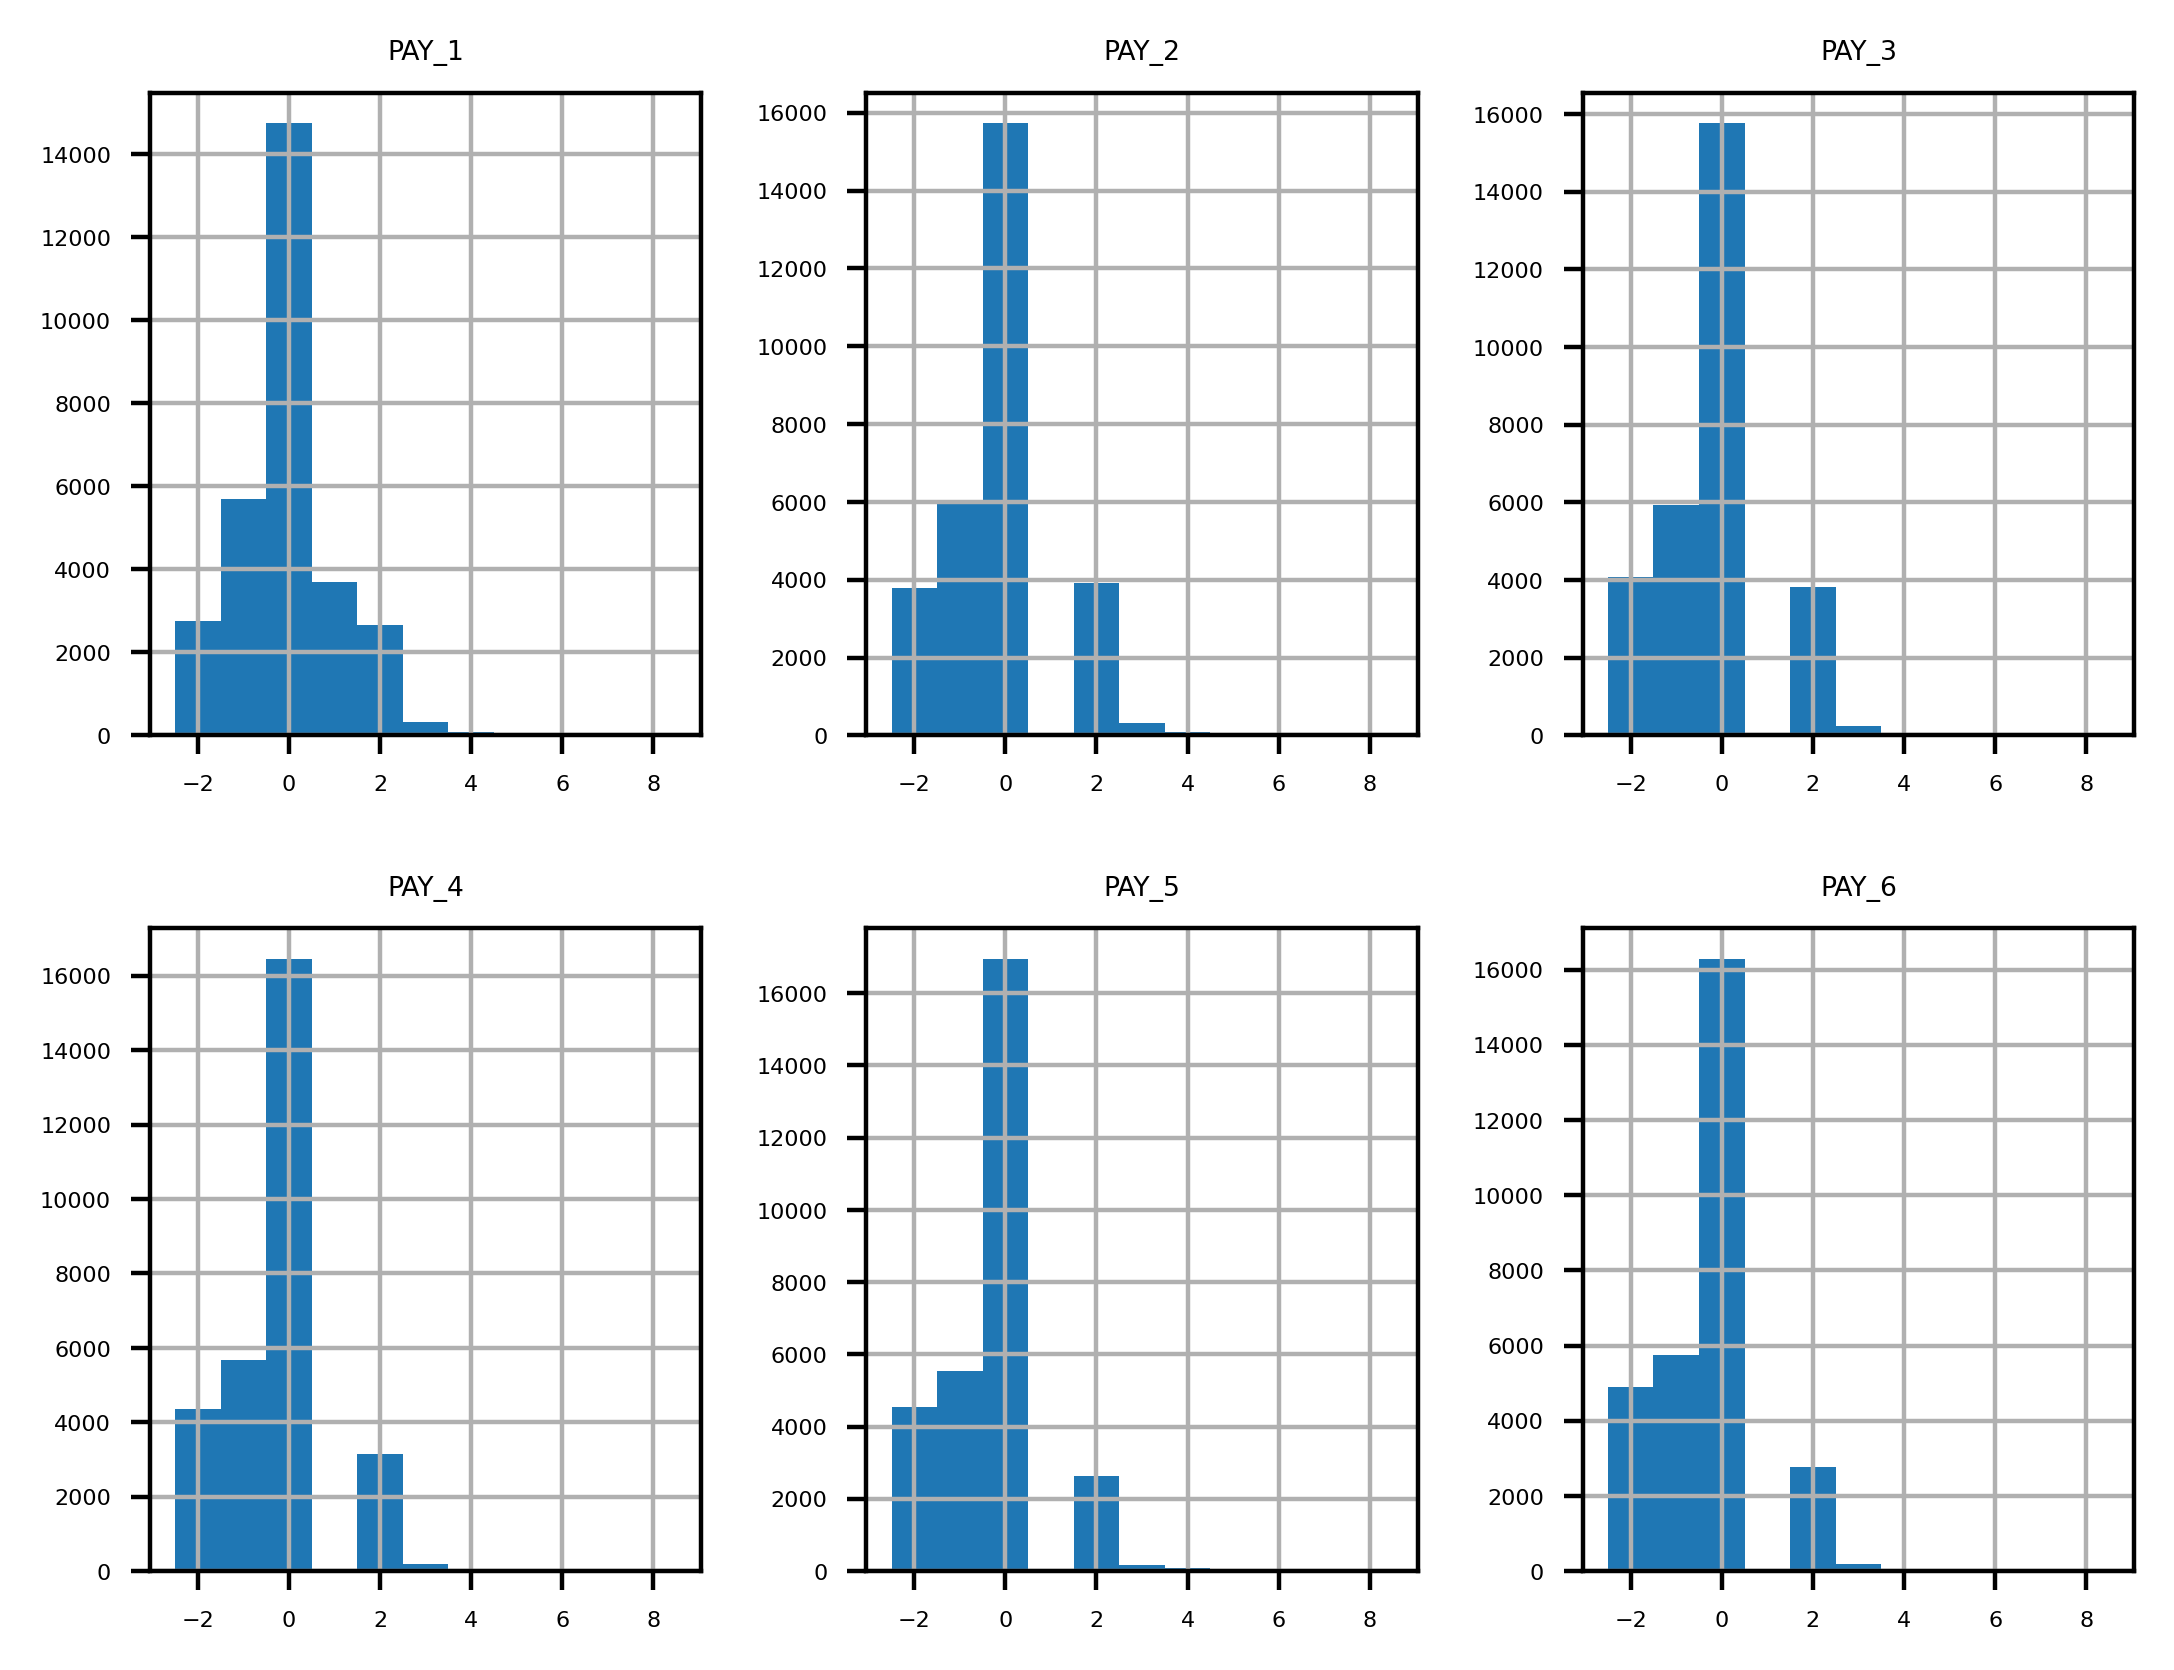

In [57]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))